---

<center><h1>Online Retail Customer Segmentation RFM Analysis</h1></center>

---

## Process Flow of Project

1. Understanding Problem Statement
2. Understanding concept of RFM Analysis
3. Getting System Ready
4. Understanding the Data-Data Eyeballing & Data Description
5. Data Cleaning & Preprocessing
6. RFM Metrics & Scores Calculation
7. Segmenting Customers based RFM Scores **(Manual Approach - Without Model Buidling)**
8. Model I : K-Means Clustering
9. Model II : Hierarchical Clustering
9. Selection of Best Model & Hyperparameter Tuninng
10. Generating Pickle file

## 1) Understanding Problem Statement
---

### Problem Statement:
Online retailers have a vast customer base with diverse shopping behaviors. To enhance marketing strategies and customer engagement, there is a need to segment customers into distinct groups based on their recency, frequency and monetary (RFM) characteristics. This project aims to segment customers effectively to provide tailored marketing campaigns and improve overall business performance.

### Approach:
Given that the data is already available, the approach involves preprocessing the existing online retail transaction data, calculating **RFM metrics*, applying **K-Means** and **Hierarchical clustering** for customer segmentation, interpreting and labeling clusters and using insights to optimize marketing strategies and enhance customer engagement.

### Objective:
To effectively segment online retail customers based on their RFM characteristics using clustering techniques (K-Means and Hierarchical) to improve targeted marketing, boost revenue, enhance customer retention, optimize inventory management and increase overall customer satisfaction.

### Benefits:
The benefits of this solution include:

- **Improved Customer Engagement:** Tailored marketing campaigns and personalized recommendations for each customer segment lead to higher engagement and conversion rates.

- **Increased Revenue:** Targeting high-value customer segments with the right offers can boost sales and revenue.

- **Customer Retention:** Identifying at-risk and churned customer segments allows for proactive retention efforts.

- **Resource Optimization:** Efficient allocation of resources in inventory management and marketing efforts based on customer preferences.

- **Enhanced Customer Satisfaction:** Providing customers with products and offers that match their preferences leads to higher satisfaction and loyalty.

- **Data-Driven Decision Making:** The project promotes data-driven decision-making, helping the company adapt to changing customer behaviors and market trends.

- **Competitive Advantage:** The ability to understand and cater to customer segments better can provide a competitive edge in the online retail industry.

## 2) Understanding concept of RFM Analysis
---

### Recency Frequency Monetary (RFM) Analysis

RFM Analysis is a **customer segmentation technique** used by businesses to better understand and categorize their customers based on their **past purchasing behavior**. This approach helps companies identify and target specific customer groups for marketing and personalization efforts. Here's a breakdown of the three components of RFM Analysis:

1. **Recency (R):** Recency refers to **how recently a customer has made a purchase or interacted with your business**. It is typically measured in terms of the **number of days since the last purchase or interaction**. Customers who have engaged with your business **more recently** are often considered **more valuable** because they are more likely to make repeat purchases.

   - Example: A customer who made a purchase 3 days ago is considered more recent than a customer who made a purchase 3 months ago.

2. **Frequency (F):** Frequency measures **how often a customer makes purchases or interacts with your business** over a specific period such as a year. It represents **customer loyalty and engagement**. Customers who buy from you frequently are more likely to be loyal and responsive to promotions.

   - Example: A customer who makes monthly purchases is considered more frequent than a customer who makes annual purchases.

3. **Monetary (M):** Monetary represents the **total amount of money a customer has spent on your products or services**. It helps determine the **value or profitability of each customer**. Customers who have **spent more money** are typically considered **high-value customers**.

   - Example: A customer who has spent Rs. 1,000 with your business is considered more valuable than a customer who has spent Rs. 100.

<br>

### Approach behind RFM Analysis

RFM Analysis involves **scoring or ranking** customers based on these three dimensions. Each dimension is typically divided into **categories or percentiles** (e.g. quintiles or deciles) and customers are assigned scores or labels based on where they fall within these categories. For example, you might score recency from 1 to 5, with 5 being the most recent and do the same for frequency and monetary value. Once customers are assigned RFM scores, they can be segmented into different groups. These segments can then be used for various marketing and customer engagement strategies such as:

- **Targeted marketing campaigns:** Focus marketing efforts on high RFM-score segments that are more likely to respond positively.
- **Customer retention:** Identify at-risk customers (e.g. low frequency or monetary value) and implement strategies to retain them.
- **Personalization:** Tailor product recommendations or content to match the preferences and behavior of each segment.
- **Product development:** Use RFM insights to inform product or service offerings for different customer segments.

<br>

### Real Life Industry Applications

1. **Retail Industry:**
   - **Promotion Targeting:** Retailers use RFM segments to identify high-value customers who are more likely to respond positively to discounts and promotions. They can then tailor their marketing campaigns to specifically target these segments.
   - **Inventory Management:** RFM can help retailers manage inventory by understanding which products are most popular among different customer segments. This information helps optimize stock levels and product placement.

2. **E-commerce:**
   - **Personalized Recommendations:** Online retailers use RFM data to provide personalized product recommendations to customers based on their past behavior, increasing the likelihood of additional purchases.
   - **Cart Abandonment Recovery:** RFM can help identify customers who frequently abandon their shopping carts. Retailers can then send targeted follow-up emails or incentives to encourage them to complete their purchases.

3. **Hospitality and Tourism:**
   - **Customer Loyalty Programs:** Hotels and airlines use RFM analysis to reward loyal customers with special offers, upgrades or discounts thereby encouraging repeat bookings.
   - **Seasonal Pricing:** Understanding the recency and frequency of bookings allows businesses in this sector to adjust pricing strategies for different seasons and periods of high demand.

4. **Financial Services:**
   - **Risk Assessment:** Banks and insurance companies use RFM Analysis to assess customer risk. Customers who exhibit erratic behavior in terms of recency, frequency and monetary transactions may be flagged for further review.
   - **Cross-Selling:** Financial institutions can identify opportunities to cross-sell or upsell products and services to customers based on their RFM profiles.

5. **Subscription Services:**
   - **Churn Prediction:** Subscription-based businesses like streaming services or SaaS companies use RFM to predict customer churn. They can then take proactive measures to retain customers showing signs of disengagement.
   - **Tiered Pricing:** Different subscription tiers can be offered to customers based on their RFM scores, ensuring that they receive the level of service that matches their value to the business.

6. **Healthcare:**
   - **Patient Engagement:** Healthcare providers use RFM to segment patients and tailor communication strategies to encourage regular check-ups or follow-up appointments.
   - **Medication Adherence:** Understanding the frequency and recency of prescription refills can help healthcare professionals identify patients who may need additional support to adhere to their treatment plans.

7. **Nonprofits and Fundraising:**
   - **Donor Engagement:** Nonprofit organizations analyze RFM to identify and engage with their most committed donors, helping to optimize fundraising efforts and donor retention.
   - **Campaign Effectiveness:** Understanding the monetary contributions and recency of donations can help nonprofits assess the success of various fundraising campaigns.


## 3) Getting System Ready
---

### Import Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn, libraries for Clustering and Warnings Library

In [1]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 4) Understanding the Data-Data Eyeballing & Data Description
---

Online retail Dataset is a transnational data set which contains all the transactions occurring between 01/12/2009 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

[Dataset Source](https://archive.ics.uci.edu/dataset/352/online+retail)

#### The given dataset has two sheet Year 2009-2010 and 2010-2011. We need to concatenate both sheets into one DataFrame.

In [2]:
retail_2009_2010 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
retail_2009_2010

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [3]:
retail_2010_2011 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
retail_2010_2011

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
retail = pd.concat([retail_2009_2010,retail_2010_2011])
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
print('The size of Dataframe is: ', retail.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
retail.info()
print('-'*100)

The size of Dataframe is:  (1067371, 8)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB
---------------------------------------------------------------------------------------------------

In [6]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in retail.columns if retail[feature].dtype != 'O']
categorical_features = [feature for feature in retail.columns if retail[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Quantity', 'InvoiceDate', 'Price', 'Customer ID']

We have 4 categorical features : ['Invoice', 'StockCode', 'Description', 'Country']


### Data Description

- **Invoice:** Invoice number. A unique number for each transaction. If it starts with C which means cancelled operations.

- **StockCode:** Product code. A unique number for each product.

- **Description:** Product name.

- **Quantity:** It refers to how many of the products in the invoices have been sold.

- **InvoiceDate:** Invoice date.

- **Price:** Product price (pound)

- **Customer ID:** Unique customer number.

- **Country:** The name of the country where the customer lives.

In [7]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total=retail.isnull().sum().sort_values(ascending=False)
percent=(retail.isnull().sum()/retail.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
Customer ID,243007,22.766873
Description,4382,0.410541
Invoice,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
Price,0,0.000000
Country,0,0.000000


In [8]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
retail.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


In [9]:
print('Summary Statistics of categorical features for DataFrame are as follows:')
print('-'*100)
retail.describe(include= 'object')

Summary Statistics of categorical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,Invoice,StockCode,Description,Country
count,1067371,1067371,1062989,1067371
unique,53628,5305,5698,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1350,5829,5918,981330


In [10]:
print('-'*125)
print('Checking records for mis-spell, typo-error etc.')
print('-'*125)

print("'Invoice' variable have {} unique category : \n{}\n".format(retail['Invoice'].nunique(), retail['Invoice'].unique()))
print('-'*125)

print("'StockCode' variable have {} unique category : \n{}\n".format(retail['StockCode'].nunique(), retail['StockCode'].unique()))
print('-'*125)

print("'Description' variable have {} unique category : \n{}\n".format(retail['Description'].nunique(), retail['Description'].unique()))
print('-'*125)

print("'Country' variable have {} unique category : \n{}\n".format(retail['Country'].nunique(), retail['Country'].unique()))
print('-'*125)

-----------------------------------------------------------------------------------------------------------------------------
Checking records for mis-spell, typo-error etc.
-----------------------------------------------------------------------------------------------------------------------------
'Invoice' variable have 53628 unique category : 
[489434 489435 489436 ... 581585 581586 581587]

-----------------------------------------------------------------------------------------------------------------------------
'StockCode' variable have 5305 unique category : 
[85048 '79323P' '79323W' ... 23609 23617 23843]

-----------------------------------------------------------------------------------------------------------------------------
'Description' variable have 5698 unique category : 
['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'mixed up'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']

------------------------------

## 5) Data Cleaning & Preprocessing
---

### Missing Value Treatment

In [11]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total=retail.isnull().sum().sort_values(ascending=False)
percent=(retail.isnull().sum()/retail.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
Customer ID,243007,22.766873
Description,4382,0.410541
Invoice,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
Price,0,0.000000
Country,0,0.000000


**22.76% of Customer ID is missing. Drop the columns as primary information Customer ID is missing**

#### Dropping empty Customer ID

In [12]:
retail = retail.dropna()
retail.shape

(824364, 8)

### Datatype Conversion

Changing DataType of Customer ID as per Business requirement

In [13]:
retail['Customer ID'] = retail['Customer ID'].astype(str)

In [14]:
retail.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID            object
Country                object
dtype: object

### Removing invalid entries from columns

Price and Quantity must be positive values i.e. greater than 0)

In [15]:
(retail['Price']<=0).value_counts()

Price
False    824293
True         71
Name: count, dtype: int64

**There exists invalid values for Price column. 71 row entries are less than or equal to 0**

In [16]:
retail.shape

(824364, 8)

In [17]:
retail = retail[retail['Price']>0]

In [18]:
retail.shape

(824293, 8)

In [19]:
(retail['Quantity']<=0).value_counts()

Quantity
False    805549
True      18744
Name: count, dtype: int64

**There exists invalid values for Quantity column. 18744 row entries are negative (less than 0). We need to drop these rows**

In [20]:
retail.shape

(824293, 8)

In [21]:
retail = retail[retail['Quantity']>=0]

In [22]:
retail.shape

(805549, 8)

In [23]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## 6) RFM Metrics &  Scores Calculation
---

### RFM Attribute Creation(Feature Engineering)

- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

#### New Attribute Creation: Monetary

In [24]:
# New Attribute : Monetary

retail['Amount'] = retail['Quantity']*retail['Price']
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [25]:
rfm_m = retail.groupby('Customer ID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.columns = ['Customer ID', 'Monetary']
rfm_m.head()

,Customer ID,Monetary
0,12346.0,77556.46
1,12347.0,5633.32
2,12348.0,2019.40
3,12349.0,4428.69
4,12350.0,334.40


#### New Attribute Creation: Frequency

In [26]:
# New Attribute : Frequency

rfm_f = retail.groupby('Customer ID')['Invoice'].count()
rfm_f = rfm_f.reset_index()
rfm_f.head()

,Customer ID,Invoice
0,12346.0,34
1,12347.0,253
2,12348.0,51
3,12349.0,175
4,12350.0,17


In [27]:
rfm_f.columns = ['Customer ID', 'Frequency']
rfm_f.head()

,Customer ID,Frequency
0,12346.0,34
1,12347.0,253
2,12348.0,51
3,12349.0,175
4,12350.0,17


In [28]:
# Merging the newly created dataframes together

rfm = pd.merge(rfm_m, rfm_f, on='Customer ID', how='inner')
rfm.head()

,Customer ID,Monetary,Frequency
0,12346.0,77556.46,34
1,12347.0,5633.32,253
2,12348.0,2019.40,51
3,12349.0,4428.69,175
4,12350.0,334.40,17


#### New Attribute Creation: Recency

In [29]:
retail.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID            object
Country                object
Amount                float64
dtype: object

**InvoiceDate already in datetime datatype. Here no need for DataType Conversion**

In [30]:
# Getting Data range

min_date = min(retail['InvoiceDate'])
max_date = max(retail['InvoiceDate'])

print(min_date,max_date)

2009-12-01 07:45:00 2011-12-09 12:50:00


In [31]:
# Compute the difference between max date and transaction date

retail['Diff_Days'] = max_date - retail['InvoiceDate']
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount,Diff_Days
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,738 days 05:05:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,738 days 05:05:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,738 days 05:05:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,738 days 05:05:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,738 days 05:05:00


In [32]:
# Compute last transaction date to get the recency of customers

rfm_r = retail.groupby('Customer ID')['Diff_Days'].min()
rfm_r = rfm_r.reset_index()
rfm_r.head()

,Customer ID,Diff_Days
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [33]:
# Extract number of days only

rfm_r['Diff_Days'] = rfm_r['Diff_Days'].dt.days
rfm_r.head()

,Customer ID,Diff_Days
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [34]:
# Merge all the newly created attribute to get the final RFM dataframe

rfm = pd.merge(rfm,rfm_r, on='Customer ID', how='inner')
rfm.columns = ['Customer ID', 'Monetary', 'Frequency', 'Recency']
rfm.head()

,Customer ID,Monetary,Frequency,Recency
0,12346.0,77556.46,34,325
1,12347.0,5633.32,253,1
2,12348.0,2019.40,51,74
3,12349.0,4428.69,175,18
4,12350.0,334.40,17,309


In [35]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Monetary,5878.0,3018.616737,14737.731040,2.95,348.7625,898.915,2307.09,608821.65
Frequency,5878.0,137.044743,353.818629,1.00,21.0000,53.000,142.00,12890.00
Recency,5878.0,200.331916,209.338707,0.00,25.0000,95.000,379.00,738.00


In [36]:
rfm.shape

(5878, 4)

**`Note:`** There are 5878 unique count of customers.

### Calculating RFM Scores using RFM Metrics

In [37]:
rfm_scores = rfm.copy()

In [38]:
rfm_scores.head()

,Customer ID,Monetary,Frequency,Recency
0,12346.0,77556.46,34,325
1,12347.0,5633.32,253,1
2,12348.0,2019.40,51,74
3,12349.0,4428.69,175,18
4,12350.0,334.40,17,309


For each RFM dimension, score can be calculated in several ways: 

- 1.Percentiles e.g. quantiles

- 2.Pareto 80/20 cut

- 3.Custom based on business knowledge

We are going to implement **percentile-based grouping** for each RFM dimension. Later combined label is created using these each RFM dimension.


### Process of calculating percentiles:

- Sort customers based on that metric
- Break customers into a pre-defined number of groups of equal size
- Assign a label to each group

### Individual RFM dimension label

For each RFM dimension, assign labels to the categories based on the behavior we want to capture. These labels should be intuitive and provide insight into customer behavior. Here's an example for each dimension:

   - **Recency (R):**
     - Label 5: "Very Recent"
     - Label 4: "Recent"
     - Label 3: "Moderate"
     - Label 2: "Infrequent"
     - Label 1: "Very Infrequent"

   - **Frequency (F):**
     - Label 5: "Very Frequent"
     - Label 4: "Frequent"
     - Label 3: "Moderate"
     - Label 2: "Infrequent"
     - Label 1: "Very Infrequent"

   - **Monetary (M):**
     - Label 5: "High Spending"
     - Label 4: "Above Average Spending"
     - Label 3: "Average Spending"
     - Label 2: "Below Average Spending"
     - Label 1: "Low Spending"

### Combined RFM Labels

Once we have assigned labels to the categories for each RFM dimension, you can create a **combined RFM label** for each customer by **concatenating the individual dimension labels** or by **adding individual dimension scores**. For example:
   
   - If a customer has **R=4, F=5, and M=3**, their combined RFM label would be **"Recent-Very Frequent-Average Spending."**


#### We will rate "Recency" customer who have been active more recently better than the less recent customer,because each company wants its customers to be recent

#### We will rate "Frequency" and "Monetary Value" higher label because we want Customer to spend more money and visit more often (that is different order than recency).

### Creating Individual RFM Dimension label

In [39]:
#Date from customer's last purchase.The nearest date gets 5 and the furthest date gets 1.
rfm_scores['Recency_Score'] = pd.qcut(rfm_scores['Recency'],5,labels=[5,4,3,2,1])
# Total number of purchases.The least frequency gets 1 and the maximum frequency gets 5.
rfm_scores['Frequency_Score'] = pd.qcut(rfm_scores['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])
#Total spend by the customer.The least money gets 1, the most money gets 5.
rfm_scores['Monetary_Score'] = pd.qcut(rfm_scores['Monetary'],5,labels=[1,2,3,4,5])

In [40]:
rfm_scores.head()

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score
0,12346.0,77556.46,34,325,2,2,5
1,12347.0,5633.32,253,1,5,5,5
2,12348.0,2019.40,51,74,3,3,4
3,12349.0,4428.69,175,18,5,4,5
4,12350.0,334.40,17,309,2,2,2


- **`Best Recency score = 5:` most recently purchase.** 
- **`Best Frequency score = 5:` most number of purchase.**
- **`Best Monetary score = 5:` spent the most.**

### Creating Combined RFM Label

#### Method-1:  By concatenating the individual dimension labels

In [41]:
rfm_scores['RFM_Score_Segment'] = (rfm_scores['Recency_Score'].astype(str)+rfm_scores['Frequency_Score'].astype(str)+rfm_scores['Monetary_Score'].astype(str))

In [42]:
rfm_scores.head()

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Segment
0,12346.0,77556.46,34,325,2,2,5,225
1,12347.0,5633.32,253,1,5,5,5,555
2,12348.0,2019.40,51,74,3,3,4,334
3,12349.0,4428.69,175,18,5,4,5,545
4,12350.0,334.40,17,309,2,2,2,222


#### Method-2:  By adding individual dimension label scores

In [43]:
rfm_scores['RFM_Score_Sum'] = rfm_scores[['Recency_Score','Frequency_Score','Monetary_Score']].sum(axis=1)

In [44]:
rfm_scores.head()

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Segment,RFM_Score_Sum
0,12346.0,77556.46,34,325,2,2,5,225,9
1,12347.0,5633.32,253,1,5,5,5,555,15
2,12348.0,2019.40,51,74,3,3,4,334,10
3,12349.0,4428.69,175,18,5,4,5,545,14
4,12350.0,334.40,17,309,2,2,2,222,6


### `Note:`
- Adding individual dimension score( eg. 5+1+1) will create a score  between 3 and 15. Here each of the scores got same importance whether its **413 & 431**. However both **413 & 431** represent different segment.

## 7) Segmenting Customers based on RFM Scores 
#### (Manual Approach - Without Model Building)
---

### Method-1: Interpeting Customer Segmentation using RFM_Score_Sum

In [45]:
rfm_scores.groupby(['RFM_Score_Sum']).agg({'Recency': 'mean',
                                           'Frequency': 'mean',
                                           'Monetary': ['mean', 'count']}).round(1)

Recency Frequency Monetary      
                 mean      mean     mean count
RFM_Score_Sum                                 
3               569.1       7.6    141.7   353
4               444.9      13.2    204.4   402
5               372.3      19.8    323.7   494
6               282.7      24.8    421.3   500
7               248.4      33.7    717.4   493
8               210.9      48.4    946.7   481
9               163.4      61.9   1427.8   514
10              136.2      82.3   1413.2   436
11               91.0     109.3   2507.6   486
12               69.6     170.3   2982.0   452
13               39.7     221.7   3927.4   427
14               23.8     351.6   7261.4   411
15                6.7     695.7  18306.8   429

#### Use RFM_Score_Sum to group customers into Gold, Silver and Bronze segments

In [46]:
def segments(df):
    if df['RFM_Score_Sum'] > 9 :
        return 'Gold'
    elif (df['RFM_Score_Sum'] > 5) and (df['RFM_Score_Sum'] <= 9 ):
        return 'Sliver'
    else:  
        return 'Bronze'

In [47]:
rfm_scores['Segment Name'] = rfm_scores.apply(segments,axis=1)

In [48]:
rfm_scores.head()

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Segment,RFM_Score_Sum,Segment Name
0,12346.0,77556.46,34,325,2,2,5,225,9,Sliver
1,12347.0,5633.32,253,1,5,5,5,555,15,Gold
2,12348.0,2019.40,51,74,3,3,4,334,10,Gold
3,12349.0,4428.69,175,18,5,4,5,545,14,Gold
4,12350.0,334.40,17,309,2,2,2,222,6,Sliver


In [49]:
rfm_scores.groupby(['Segment Name']).agg({'Recency':'mean',
                                         'Frequency':'mean',
                                         'Monetary':['mean','count']}).round(1).sort_values(by=('Monetary','count'), 
                                                                                            ascending=False)

Recency Frequency Monetary      
                mean      mean     mean count
Segment Name                                 
Gold            62.3     266.4   5943.9  2641
Sliver         226.0      42.3    882.1  1988
Bronze         451.3      14.2    233.8  1249

#### Inference

- **Gold Customers:** 2643
- **Silver Customers:** 1992
- **Bronze Customers:** 1246

### Method-2: Interpeting Customer Segmentation using RFM_Score_Segment

### Based on Recency & Frequency Score
- **can't loose them →** A class of customers who used to shop very frequently but have not shopped for a long time and should not be lost.
- **at risk →** A class of customers who shop relatively frequently but have not shopped for a long time. 
- **hibernating →** Customers who are literally asleep, both shopped infrequently and have not shopped for a long time.
- **about to sleep →** A class of customers who do not shop frequently and have not shopped for some time; they are heading towards sleep.
- **need attention →** This is the class of customers in the middle of the RF graph (33%), moving towards the risky group if not addressed.
- **new customers →** A class of customers who have not shopped frequently (maybe once) and have been shopping for a short period of time, they are considered as new customers.
- **promising →** New customers are the aged version of new customers :) they are customers who have not shopped frequently and have shopped for a short period of time.
- **potential loyalists →** Customers who shop moderately often and it has not been long since their last purchase.
- **loyal customers →** Customers who shop very often and it has been a short time since their last purchase.
- **champions →** They are our champions, our crown jewels! Customers who shop very often and have made their last purchase within a very short period of time.

![image.png](rfm_label.png)

In [50]:
# Display the top 10 segments with the most customers
rfm_scores.groupby(['RFM_Score_Segment']).size().sort_values(ascending=False)[:10]

RFM_Score_Segment
555    429
111    353
455    248
211    198
122    177
222    163
344    160
444    150
333    144
233    141
dtype: int64

#### Mapping Segment as per Recency and Frequency Score (Keeping Monetary Unchanged)

In [51]:
segment_mapping = {r'[1-2][1-2][1-5]': 'Hibernating',
                   r'[1-2][3-4][1-5]': 'At Risk',
                   r'[1-2][5][1-5]': 'Can\'t Loose',
                   r'[3][1-2][1-5]': 'About to Sleep',
                   r'[3][3][1-5]': 'Need Attention',
                   r'[3-4][4-5][1-5]': 'Loyal Customers',
                   r'[4][1][1-5]': 'Promising',
                   r'[5][1][1-5]': 'New Customers',
                   r'[4-5][2-3][1-5]': 'Potential Loyalists',
                   r'[5][4-5][1-5]': 'Champions'
                  }

In [52]:
rfm_scores['Segment'] = rfm_scores['RFM_Score_Segment'].replace(segment_mapping,regex=True)
#rfm_scores.reset_index(inplace=True)
rfm_scores.head()

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Segment,RFM_Score_Sum,Segment Name,Segment
0,12346.0,77556.46,34,325,2,2,5,225,9,Sliver,Hibernating
1,12347.0,5633.32,253,1,5,5,5,555,15,Gold,Champions
2,12348.0,2019.40,51,74,3,3,4,334,10,Gold,Need Attention
3,12349.0,4428.69,175,18,5,4,5,545,14,Gold,Champions
4,12350.0,334.40,17,309,2,2,2,222,6,Sliver,Hibernating


In [53]:
rfm_scores.groupby(['Segment']).agg({"Customer ID":"count"}).sort_values("Customer ID",ascending=False)

,Customer ID
Segment,
Hibernating,1437
Loyal Customers,1135
Champions,821
At Risk,802
Potential Loyalists,676
About to Sleep,428
Need Attention,270
Promising,125
Can't Loose,108


In [54]:
rfm_scores[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count","max"]).round()

Recency            Frequency              Monetary        \
                       mean count  max      mean count    max     mean count   
Segment                                                                        
About to Sleep        109.0   428  188      18.0   428     37    670.0   428   
At Risk               394.0   802  737      74.0   802    178   1315.0   802   
Can't Loose           346.0   108  623     325.0   108   2796   4651.0   108   
Champions               8.0   821   18     449.0   821  12890  10934.0   821   
Hibernating           451.0  1437  738      16.0  1437     37    518.0  1437   
Loyal Customers        64.0  1135  188     234.0  1135   1874   4165.0  1135   
Need Attention        107.0   270  187      55.0   270     76   1403.0   270   
New Customers           9.0    76   18       9.0    76     16   2927.0    76   
Potential Loyalists    25.0   676   58      44.0   676     76   1184.0   676   
Promising              37.0   125   58       9.0   125     16    395.0   125   

                               
                          max  
Segment                        
About to Sleep        39916.0  
At Risk               67502.0  
Can't Loose           56600.0  
Champions            608822.0  
Hibernating           77556.0  
Loyal Customers      144458.0  
Need Attention        16246.0  
New Customers        168472.0  
Potential Loyalists   30393.0  
Promising              5120.0

#### Inference

- **About to Sleep:** 428
- **At Risk:** 802
- **Can't Loose:** 108
- **Champions:** 821
- **Hibernating:** 1439
- **Loyal Customers:** 1135
- **Need Attention:** 270
- **New Customers:** 77
- **Potential Loyalists:** 677
- **Promising:** 124

### Method-3: Interpeting Customer Segmentation using RFM_Score_Segment

### Based on all three RFM dimension (Recency, Frequency & Monetary)

**Below image shows the inverse scoring. We need to 1 against 5 and 5 against 1**
![image.jpg](rfm_label_2.jpg)

#### Mapping Segment as per all three RFM dimension

In [55]:
segment_mapping = {r'[4-5][4-5][4-5]': 'Best Customers',
                   r'[1-5][4-5][1-5]': 'Loyal Customers',
                   r'[1-5][1-5][4-5]': 'Big Spenders',
                   r'[2-3][1-5][1-5]': 'Almost Lost',
                   r'[1][1-5][1-5]': 'Lost Customers',
                   r'[4-5][1-3][1-3]': 'Recent Active Low Spender',
                  }

In [56]:
rfm_scores['Segment_New'] = rfm_scores['RFM_Score_Segment'].replace(segment_mapping,regex=True)
#rfm_scores.reset_index(inplace=True)
rfm_scores.head()

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Segment,RFM_Score_Sum,Segment Name,Segment,Segment_New
0,12346.0,77556.46,34,325,2,2,5,225,9,Sliver,Hibernating,Big Spenders
1,12347.0,5633.32,253,1,5,5,5,555,15,Gold,Champions,Best Customers
2,12348.0,2019.40,51,74,3,3,4,334,10,Gold,Need Attention,Big Spenders
3,12349.0,4428.69,175,18,5,4,5,545,14,Gold,Champions,Best Customers
4,12350.0,334.40,17,309,2,2,2,222,6,Sliver,Hibernating,Almost Lost


In [57]:
rfm_scores.groupby(['Segment_New']).agg({"Customer ID":"count"}).sort_values("Customer ID",ascending=False)

,Customer ID
Segment_New,
Almost Lost,1384
Best Customers,1273
Loyal Customers,1078
Lost Customers,990
Recent Active Low Spender,713
Big Spenders,440


#### Inference
	
- **Almost Lost:**	1397
- **Best Customers:**	1273
- **Loyal Customers:**	1079
- **Lost Customers:**	977
- **Recent Active Low Spender:**	714
- **Big Spenders:**	441

## Model I : K-Means Clustering
---
K-Means clustering is a popular **unsupervised machine learning algorithm** used for clustering data points into groups or clusters. In order to apply K-Means, we must check if the key assumptions of K-Means Clustering are followed.

### Key Assumptions of K-Means

1. **Symmetric Distribution of Variables (Not Skewed):** K-Means assumes that the variables have a **roughly symmetric distribution and are not heavily skewed**. This is because K-Means uses the mean (centroid) of data points within a cluster to define the cluster center. If the data is highly skewed with a long tail on one side, the mean may not be a representative measure of central tendency and K-Means may not perform well. In such cases, you may need to consider data transformation techniques to make the data more symmetric.

2. **Variables with Same Average Values:** K-Means assumes that the variables have **similar means**. If the variables have significantly different average values, it can lead to unequal contributions of variables to the distance calculation between data points which can impact the clustering results. **Standardizing or scaling** the variables (e.g. using z-score normalization) can help address this issue by giving all variables equal importance.

3. **Variables with Same Variance:** K-Means also assumes that the variables have **roughly equal variances**. Variables with different variances can disproportionately affect the distance calculations because K-Means uses the Euclidean distance metric which is sensitive to the scale of the variables. Again, standardizing or scaling the variables can help mitigate this problem.

### What if Assumptions are not followed
In practice, data rarely perfectly satisfies these assumptions and K-Means can still be applied with some caution. However, when these assumptions are strongly violated, itx is advisable to consider **alternative clustering algorithms** or **preprocessing techniques** such as:

- Using data transformation methods like **log-transform** for skewed data.
- **Normalizing or standardizing** the data to make variables have the same scale.
- Using **different distance metrics** that can handle differences in variance.
- Exploring other clustering algorithms like **DBSCAN or hierarchical clustering** that are less sensitive to these assumptions.

In [58]:
rfm.head()

,Customer ID,Monetary,Frequency,Recency
0,12346.0,77556.46,34,325
1,12347.0,5633.32,253,1
2,12348.0,2019.40,51,74
3,12349.0,4428.69,175,18
4,12350.0,334.40,17,309


### Checking for Mean and Variance Assumption

In [59]:
rfm.describe()

,Monetary,Frequency,Recency
count,5878.000000,5878.000000,5878.000000
mean,3018.616737,137.044743,200.331916
std,14737.731040,353.818629,209.338707
min,2.950000,1.000000,0.000000
25%,348.762500,21.000000,25.000000
50%,898.915000,53.000000,95.000000
75%,2307.090000,142.000000,379.000000
max,608821.650000,12890.000000,738.000000


#### Inference
From this table, we found:
- **Problem:** Mean and Variance(Here std deviation) are not Equal
- **Solution:** Scaling variables by using a scaler from scikit-learn library

### Checking for Skewness Assumption

In [60]:
from scipy.stats import skew

In [61]:
skew_df = pd.DataFrame(columns=['Feature Name', 'Skewness'])

rfm_metrics = ['Recency','Frequency','Monetary']

for feature in rfm_metrics:
    skewness = skew(rfm[feature])
    skew_df = skew_df._append({'Feature Name': feature, 'Skewness': skewness}, ignore_index=True)

print(skew_df)

  Feature Name   Skewness
0      Recency   0.886972
1    Frequency  18.051480
2     Monetary  25.307775


**`Note:`** **append** method in pandas is now modified to **_append**

#### Inference
- **Recency** has a **mild positive skew** suggesting a slight right-leaning distribution. It is acceptable.
- **Frequency** exhibits very **high positive skewness** indicating an imbalanced distribution with a **few high-frequency outliers**.
- **Monetary** has **extremely high positive skewness** signifying a heavy right-skewed distribution with a **concentration of low values** and a **few exceptionally high monetary values**.

<br>
From above observation, we found: 

- **Problem:** UnSymmetric distribution of variables (data skewed)
- **Solution:** Logarithmic transformation (positive values only) will manage skewness

### Preprocessing Steps for Model Building

1. **Unskew the Data - Log Transformation:** Log transformation is typically used to reduce the impact of skewness in the data, especially when the data is positively skewed (skewed to the right). Taking the log of data can make it more symmetric and easier to work with. However, log transformation **can only be applied to positive data** because the logarithm of zero or a negative number is undefined. Therefore, this step should come first to address skewness.


2. **Standardize to the Same Average Values:** Standardization (or mean centering) involves subtracting the mean (average) of the data from each data point. This step helps make different variables have the same average (zero) and can make the data more suitable for certain clustering algorithms like K-Means, which are sensitive to variable scales. If you standardize before unskewing (log transformation), you could introduce bias into your data, making the log transformation less effective.

3. **Scale to the Same Standard Deviation:** Scaling involves dividing each data point by the standard deviation of the variable. This step ensures that variables have the same scale and equal importance in distance-based algorithms like K-Means. If you scale before unskewing or standardizing, it can lead to unwanted effects because you are dividing by a different standard deviation.

4. **Store as a Separate Array for Clustering:** This step is more about data organization and does not affect the data values themselves. It's important to keep a separate copy of your preprocessed data for clustering so that you can compare it with the original data or use it for various clustering algorithms.

**`Note:`** Sequence of preprocessing steps is crucial because each step builds upon the previous one and aims to address specific issues in the data. Applying them in the wrong order can lead to unintended consequences and inaccurate results. For example, Log transformation only works with positive data and Normalization forces data to have negative values and log will not work

### Unskew Data with Log Transformation

In [62]:
rfm_log_transform = rfm[['Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [63]:
skew_log_transform_df = pd.DataFrame(columns=['Feature Name', 'Skewness'])

rfm_lof_transform_features = ['Frequency','Monetary']

for feature in rfm_lof_transform_features:
    skewness = skew(rfm_log_transform[feature])
    skew_log_transform_df = skew_log_transform_df._append({'Feature Name': feature, 'Skewness': skewness}, ignore_index=True)

print(skew_log_transform_df)

  Feature Name  Skewness
0    Frequency -0.223792
1     Monetary  0.251000


**Now the skewness of all three RFM dimensions lies between -1 to 1 which is acceptable for further processing.**

In [64]:
rfm_log_transform.head()

,Frequency,Monetary
0,3.526,11.259
1,5.533,8.636
2,3.932,7.611
3,5.165,8.396
4,2.833,5.812


In [65]:
rfm.head()

,Customer ID,Monetary,Frequency,Recency
0,12346.0,77556.46,34,325
1,12347.0,5633.32,253,1
2,12348.0,2019.40,51,74
3,12349.0,4428.69,175,18
4,12350.0,334.40,17,309


In [66]:
rfm_log_transform['Customer ID'] = rfm['Customer ID']

In [67]:
rfm_log_transform['Recency'] = rfm['Recency']

In [68]:
rfm_log_transform

,Frequency,Monetary,Customer ID,Recency
0,3.526,11.259,12346.0,325
1,5.533,8.636,12347.0,1
2,3.932,7.611,12348.0,74
3,5.165,8.396,12349.0,18
4,2.833,5.812,12350.0,309
...,...,...,...,...
5873,6.894,7.914,18283.0,3
5874,3.332,6.135,18284.0,431
5875,2.485,6.057,18285.0,660
5876,4.205,7.167,18286.0,476


In [69]:
rfm_log_transform = rfm_log_transform[['Customer ID','Recency','Frequency','Monetary']]

In [70]:
rfm_log_transform

,Customer ID,Recency,Frequency,Monetary
0,12346.0,325,3.526,11.259
1,12347.0,1,5.533,8.636
2,12348.0,74,3.932,7.611
3,12349.0,18,5.165,8.396
4,12350.0,309,2.833,5.812
...,...,...,...,...
5873,18283.0,3,6.894,7.914
5874,18284.0,431,3.332,6.135
5875,18285.0,660,2.485,6.057
5876,18286.0,476,4.205,7.167


In [71]:
rfm_log_transform.describe()

,Recency,Frequency,Monetary
count,5878.000000,5878.000000,5878.000000
mean,200.331916,3.948703,6.833839
std,209.338707,1.443745,1.391568
min,0.000000,0.000000,1.082000
25%,25.000000,3.045000,5.854000
50%,95.000000,3.970000,6.801000
75%,379.000000,4.956000,7.743500
max,738.000000,9.464000,13.319000


### Normalization using Standard Scaler

In [72]:
rfm_normalization = rfm_log_transform[['Recency','Frequency','Monetary']]

In [73]:
rfm_normalization

,Recency,Frequency,Monetary
0,325,3.526,11.259
1,1,5.533,8.636
2,74,3.932,7.611
3,18,5.165,8.396
4,309,2.833,5.812
...,...,...,...
5873,3,6.894,7.914
5874,431,3.332,6.135
5875,660,2.485,6.057
5876,476,4.205,7.167


In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_normalization)
#Store it separately for clustering
rfm_normalized = scaler.transform(rfm_normalization)

In [75]:
rfm_normalized

array([[ 0.59558355, -0.29280739,  3.18025313],
       [-0.95227909,  1.09744536,  1.29516833],
       [-0.60353226, -0.01157041,  0.55852634],
       ...,
       [ 2.19599709, -1.01391008, -0.55829477],
       [ 1.31696398,  0.17753721,  0.2394346 ],
       [-0.75640758,  0.75802142,  1.08172182]])

**Now Normalization of all three RFM dimensions done and saved in separate array, we are now ready for Clustering.**

### Chosing Number of Clusters

#### Methods to define the number of Clusters
- 1. Visual Method: Elbow Criteria
- 2. Mathematical Method: Silhouette Coefficient
- 3. Experimentation and Interpretation

### Steps Involved in Elbow Criteria Method

1. **Within-Cluster Sum-of-Squared-Errors (SSE):** The SSE is a measure of the variability within each cluster. It is calculated as the sum of the squared distances between each data point and the center of its assigned cluster. In K-Means clustering, the goal is to **minimize the SSE** because it indicates that data points within each cluster are close to each other.

2. **Plotting the Number of Clusters vs. SSE:** To determine the optimal number of clusters, we can perform K-Means clustering with different values of k (the number of clusters) and calculate the SSE for each value of k. We then plot the number of clusters (k) on the x-axis and the corresponding SSE on the y-axis.

3. **Identifying the Elbow Point:** When we plot the SSE against the number of clusters, we often observe a pattern where the SSE decreases as the number of clusters increases. However, at some point, adding more clusters starts to have diminishing returns in terms of reducing SSE. The point where the **rate of decrease sharply changes**, forming an **elbow** in the plot is often considered the optimal number of clusters.

   - Before the elbow point, adding more clusters significantly reduces SSE, indicating that the clusters are too large, and data points are far from their cluster centers.
   - After the elbow point, adding more clusters has less impact on reducing SSE, suggesting that the clusters are becoming too granular, and overfitting may occur.
   
   
### What If Elbow Point is clearly Identifiable

- The optimal number of clusters is typically determined visually by looking at the plot. However, it is not always straightforward and there may not be a clear and distinct elbow. In such cases, you might need to use additional methods such as **silhouette coefficient** or make an **informed decision based on domain knowledge** and the specific goals of your analysis. 

- It is important to note that the choice of the optimal number of clusters is not always definitive and it may require **experimentation and interpretation**. Sometimes, we might choose a number of clusters that aligns with our problem's requirements or provides meaningful insights even if it's not the exact "elbow" point.


**`Note:`** The elbow criterion method is a valuable tool for guiding the selection of the number of clusters in K-Means clustering but it is essential to consider it alongside other factors and domain knowledge to make the final decision.

#### Method-1: Using `.score()` method

In [82]:
from sklearn.cluster import KMeans

cluster_iteration = range(1,10)
scores = []

for cluster_number in cluster_iteration:
    K_Means = KMeans(n_clusters=cluster_number, random_state=45)
    K_Means.fit(rfm_normalized)
    scores.append(K_Means.fit(rfm_normalized).score(rfm_normalized))

#### Elbow Curve (Number of Clusters Vs Score)

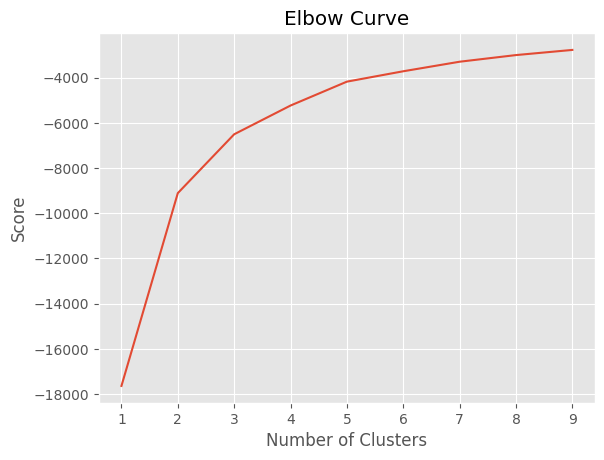

In [90]:
plt.plot(cluster_iteration,scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.xticks(cluster_iteration)
plt.style.use('ggplot')
plt.show()

#### Inference
- From the Elbow Curve, we found that optimal **number of clusters (n_clusters) is 3**

#### Method-2: Using `.inertia_` method (Within-Cluster Sum of Sqaures)

In [86]:
from sklearn.cluster import KMeans

cluster_iteration = range(1,10)
inertias = []

for cluster_number in cluster_iteration:
    K_Means = KMeans(n_clusters=cluster_number, random_state=45)
    K_Means.fit(rfm_normalized)
    inertias.append(K_Means.inertia_)

#### Elbow Curve (Number of Clusters Vs Inertia)

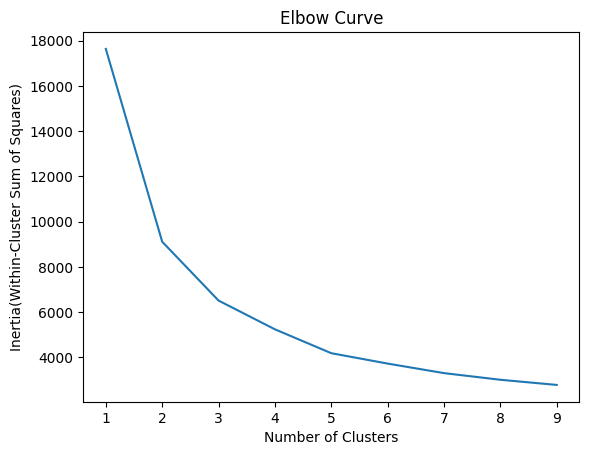

In [89]:
plt.plot(cluster_iteration,inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia(Within-Cluster Sum of Squares)')
plt.title('Elbow Curve')
plt.xticks(cluster_iteration)
plt.style.use('ggplot')
plt.show()

#### Inference
- From the Elbow Curve, we found that optimal **number of clusters (n_clusters) is 3**

### Silhouette Score Method

$$\text{Silhouette Score} = \frac{p - q}{\max(p, q)}$$

- **`p`** is the average distance from the data point to other data points in the same cluster (intra-cluster distance)

- **`q`** is is the smallest average distance from the data point to data points in a different cluster, minimized over clusters (inter-cluster distance).

The value of the silhouette score range lies between **-1 to 1**. 

    - A high silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
    - A score near 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.
    - A low score indicates that the object may have been assigned to the wrong cluster.

In [92]:
from sklearn.cluster import KMeans

cluster_iteration = range(2,10)  # Start from at least 2 clusters (Silhouette Score Requirement)
inertias = []

for cluster_number in cluster_iteration:
    K_Means = KMeans(n_clusters=cluster_number, random_state=45)
    K_Means.fit(rfm_normalized)
    clustered_labels = K_Means.labels_
    
    silhouette_avg = silhouette_score(rfm_normalized,clustered_labels)
    print(f'For n_clusters={cluster_number}, the Silhouette score is {silhouette_avg}')

For n_clusters=2, the Silhouette score is 0.4123261308720177
For n_clusters=3, the Silhouette score is 0.3658000597571643
For n_clusters=4, the Silhouette score is 0.3634579404333125
For n_clusters=5, the Silhouette score is 0.34470263873732854
For n_clusters=6, the Silhouette score is 0.3095707164886954
For n_clusters=7, the Silhouette score is 0.3101695816508853
For n_clusters=8, the Silhouette score is 0.3127230797084361
For n_clusters=9, the Silhouette score is 0.2904941702196244


#### Inference

- From Silhouette Score Analysis for different clusters, we found that optimal **number of cluster(n_clusters) is 3**.

**`Note:`** The choice of number of clusters should be based on combination of quantitative metrics like Elbow method, silhouette score and domain specific knnowledge to ensure that the clusters make sense for your specific use case.

### Final Model with number of clusters(n_cluster) = 3

In [93]:
# Clustering for final model
K_Means_final_model = KMeans(n_clusters= 3, random_state=45)
K_Means_final_model.fit(rfm_normalized)

KMeans(n_clusters=3, random_state=45)

In [94]:
#Create a cluster label column in the original DataFrame
cluster_labels = K_Means_final_model.labels_

In [95]:
cluster_labels

array([0, 0, 2, ..., 1, 1, 0])

In [97]:
rfm['Cluster'] = cluster_labels

In [98]:
rfm.head()

,Customer ID,Monetary,Frequency,Recency,Cluster
0,12346.0,77556.46,34,325,0
1,12347.0,5633.32,253,1,0
2,12348.0,2019.40,51,74,2
3,12349.0,4428.69,175,18,0
4,12350.0,334.40,17,309,1


In [100]:
rfm.groupby('Cluster').agg({'Recency': 'mean',
                            'Frequency': 'mean',
                            'Monetary': ['mean', 'count'],}).round(0)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          69.0     320.0   7371.0  2080
1         479.0      31.0    533.0  1749
2          96.0      42.0    723.0  2049

#### Inference
	
- **Cluster_0:**	2080
- **Cluster_1:**	1749
- **Cluster_2:**	2049

In [101]:
rfm_scores['Cluster'] = cluster_labels

In [102]:
rfm_scores

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Segment,RFM_Score_Sum,Segment Name,Segment,Segment_New,Cluster
0,12346.0,77556.46,34,325,2,2,5,225,9,Sliver,Hibernating,Big Spenders,0
1,12347.0,5633.32,253,1,5,5,5,555,15,Gold,Champions,Best Customers,0
2,12348.0,2019.40,51,74,3,3,4,334,10,Gold,Need Attention,Big Spenders,2
3,12349.0,4428.69,175,18,5,4,5,545,14,Gold,Champions,Best Customers,0
4,12350.0,334.40,17,309,2,2,2,222,6,Sliver,Hibernating,Almost Lost,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,18283.0,2736.65,986,3,5,5,4,554,14,Gold,Champions,Best Customers,0
5874,18284.0,461.68,28,431,1,2,2,122,5,Bronze,Hibernating,Lost Customers,1
5875,18285.0,427.00,12,660,1,1,2,112,4,Bronze,Hibernating,Lost Customers,1
5876,18286.0,1296.43,67,476,1,3,4,134,8,Sliver,At Risk,Big Spenders,1


<Axes: xlabel='Cluster', ylabel='Recency'>

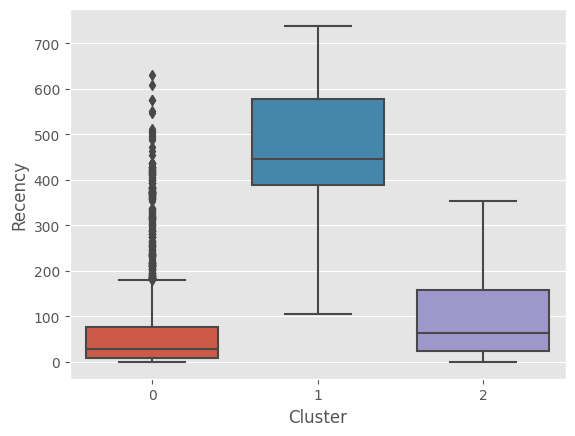

In [105]:
sns.boxplot(x=rfm_scores.Cluster,y=rfm_scores.Recency)

<Axes: xlabel='Cluster', ylabel='Frequency'>

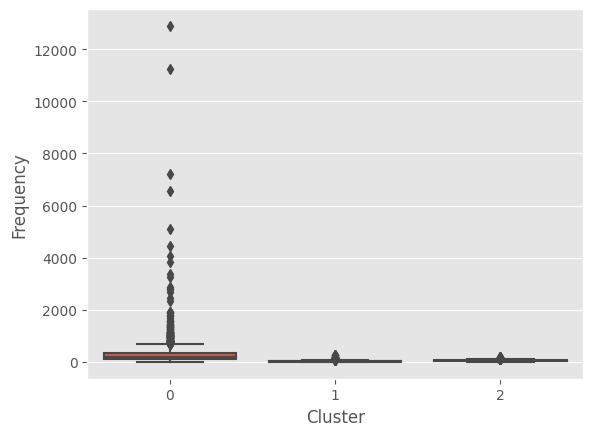

In [106]:
sns.boxplot(x=rfm_scores.Cluster,y=rfm_scores.Frequency)

<Axes: xlabel='Cluster', ylabel='Monetary'>

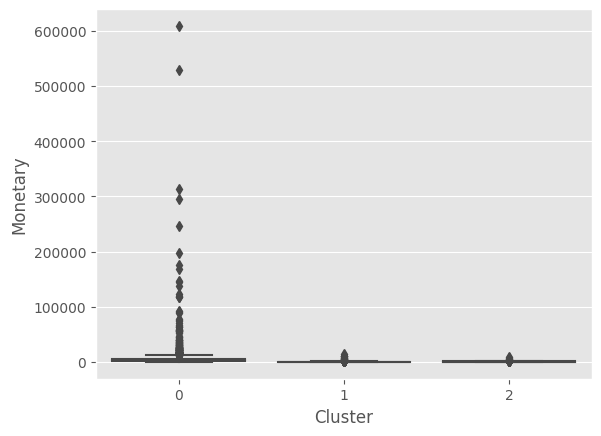

In [107]:
sns.boxplot(x=rfm_scores.Cluster,y=rfm_scores.Monetary)

#### Inference

## 9) Model-II : Hierarchical Clustering
---

Hierarchical clustering is a method of cluster analysis that builds a hierarchy of clusters by successively merging or splitting them. There are two main approaches to hierarchical clustering: **divisive and agglomerative**.

![image.jpg](clustering_classification.jpg)


### Some common linkage methods used in agglomerative hierarchical clustering:

1. **Single Linkage (Minimum Linkage):** In single linkage hierarchical clustering, the distance between two clusters is defined as the **shortest distance between any two points** in each cluster.
2. **Complete Linkage (Maximum Linkage):** In complete linkage hierarchical clustering, the distance between two clusters is defined as the **longest distance between any two points** in each cluster.
3. **Average Linkage:** In average linkage hierarchical clustering, the distance between two clusters is defined as the **average distance between each point in one cluster** to every point in the other cluster.

![image.png](hierarchical_clustering.png)

#### Single Linkage

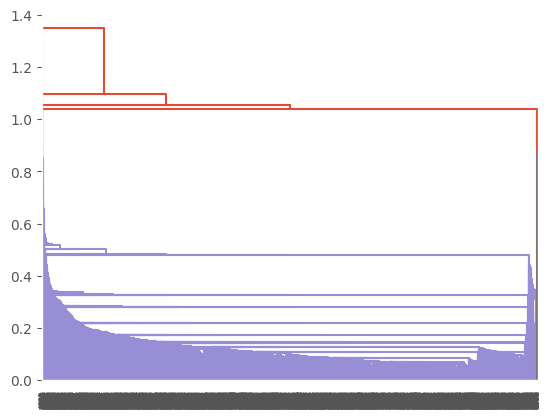

In [108]:
mergings = linkage(rfm_normalized, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Complete Linkage

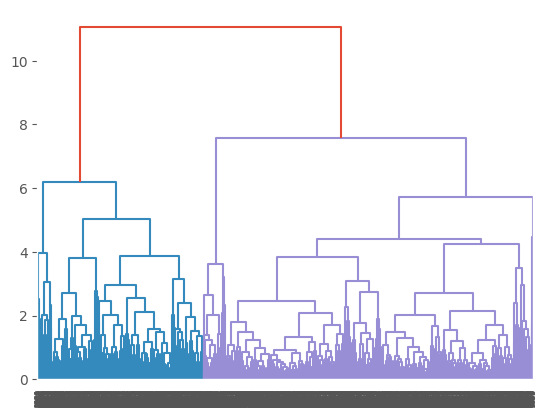

In [109]:
mergings = linkage(rfm_normalized, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Average Linkage

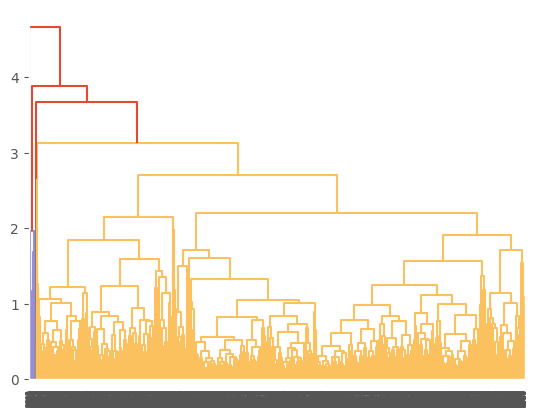

In [110]:
mergings = linkage(rfm_normalized, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

### Inference

From the above dendograms, we found optimal **number of clusters(n_clusters) is 3**.

### Creating Cluster based cutting dendograms based on value of n_clusters

In [112]:
cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [113]:
rfm['Cluster_New'] = cluster_labels
rfm.head()

,Customer ID,Monetary,Frequency,Recency,Cluster,Cluster_New
0,12346.0,77556.46,34,325,0,0
1,12347.0,5633.32,253,1,0,0
2,12348.0,2019.40,51,74,2,0
3,12349.0,4428.69,175,18,0,0
4,12350.0,334.40,17,309,1,0


In [115]:
rfm.groupby('Cluster_New').agg({'Recency': 'mean',
                            'Frequency': 'mean',
                            'Monetary': ['mean', 'count'],}).round(0)

Recency Frequency  Monetary      
               mean      mean      mean count
Cluster_New                                  
0             201.0     126.0    2610.0  5863
1              98.0    4565.0  162671.0    15

#### Inference
- **Cluster_New_0:** 5863
- **Cluster_New_1:** 15

In [114]:
rfm_scores['Cluster_New'] = cluster_labels
rfm_scores.head()

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Segment,RFM_Score_Sum,Segment Name,Segment,Segment_New,Cluster,Cluster_New
0,12346.0,77556.46,34,325,2,2,5,225,9,Sliver,Hibernating,Big Spenders,0,0
1,12347.0,5633.32,253,1,5,5,5,555,15,Gold,Champions,Best Customers,0,0
2,12348.0,2019.40,51,74,3,3,4,334,10,Gold,Need Attention,Big Spenders,2,0
3,12349.0,4428.69,175,18,5,4,5,545,14,Gold,Champions,Best Customers,0,0
4,12350.0,334.40,17,309,2,2,2,222,6,Sliver,Hibernating,Almost Lost,1,0


Now, let's focus on some segments which can be critically important for marketing strategies

champions
loyal_customers
cant_loose
need_attention
Champions:
This segment constitutes 15% of the customer portfolio and also it includes 641 customers who have made their last purchases within the last week and generate an average turnover of 6000 TL. Because of this segment consists of customers most frequently spends and can easily adopt to new products and services, cross-sales strategies can be taken for this segment.

Loyal Customers:
There are 818 customers in this segment, and while the purchasing frequency is 4 on average in all customer segments, it has been seen that average purchases are 2 times higher in this segment (average of frequency is 8). The average monetary value of this segment is 50% above the general average.

As a conclusion, in order to ensure customer loyalty sustainable, cross-sell communications in line with customer expectations and needs can be organized for this segment.

Need_Attention:
There are 184 customers that last purchased nearly 2 months ago in this segment. Although they dont make purchase frequently, total transaction amounts of these customers contribute to profitability.

As a result, Cashback and bonus campaigns can be organized for this segment to retain customers and even move them to a segment that makes more purchases. In fact, discounted product offers and campaigns based on gift coupons can be planned by observing habits of other customers with similar behaviors, and analyzing according product association rules.

Can't_loose:
Customers of Can't_Loose segment have a higher transaction frequency, even though their spending amounts are close to the loyal customer segment. However, since these customers are nearly lost customers that made last purchases nearly 4 months ago.

So, new campaign strategies based on rewards, discounts, and other special incentives as a way to attract and retain customers can be planned in order to make them feel special and loyal again.

Now that we knew our customers segments we can choose how to target or deal with each segment.

For example:

Best Customers - Champions: Reward them. They can be early adopters to new products. Suggest them "Refer a friend".

At Risk: Send them personalized emails to encourage them to shop.

tree mamp for segmentation

Reviews About the Segments
Cant Loose

There are 63 people in this segment.
Shopping was done on average 133 days ago.
The frequency of shopping is 8, the total number of purchases is 63.
A total of £102,54 has been spent.
Action: Even if the last purchase was made 133 days, the total number of purchases is high. It is a group of customers who do not come for a long time, but also make a lot of purchases when they come. We can analyze the process by sending surveys to these customers, and we can be changed by sharing personalized campaigns by e-mail.

Need Attention

There are 187 people in this segment.
Shopping was done on average 52 days ago.
The frequency of shopping is 2, the total number of purchases is 3.
A total of £12,602 has been spent.
Action: These customers need to be reminded of the brand.So, short-term discounts can be made to remind these customers of our brand and allow them to shop again.